In [2]:
import gym 
import slimevolleygym

env = gym.make('SlimeVolley-v0')

# Observation Space Printing 
print(env.observation_space)  # Will show Box space with 12 dimensions
print(env.reset().shape) 

Box([-3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38 -3.403e+38], [3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38 3.403e+38], (12,), float32)
(12,)


In [10]:
obs, reward, done, info = env.step(env.action_space.sample())

In [11]:
print("Obs: ", obs)
print("Other Obs: ", info['otherObs'])

Obs:  [ 1.317  0.275  1.75   1.154  0.     1.2    1.595  1.388  1.142  0.15  -1.75   0.   ]
Other Obs:  [ 1.142  0.15  -1.75   0.     0.     1.2   -1.595  1.388  1.317  0.275  1.75   1.154]


In [1]:
# test with loaded NEATPolicy 
import pickle, neat, glob 

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                neat.DefaultSpeciesSet, neat.DefaultStagnation,
                'zoo/neat_sp/config-neat')

pop = neat.Population(config)

genomes = list(pop.population.items())
genome = genomes[0][1]

net = neat.nn.FeedForwardNetwork.create(genome, config)


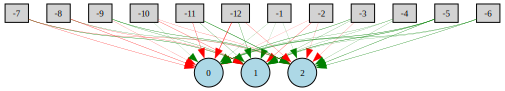

In [2]:
from slimevolleygym.visualize import draw_net
draw_net(config, genome) # Issue: No connection between input-output nodes

In [3]:
import numpy as np 
for i in range(100):
    obs = np.random.uniform(0, 1, 12)
    print(net.activate(obs))
    
# Bug :: NEAT network always give 0.0 output all the time, irrelevant to input values ...

[4.1763850487620106e-07, 0.9766996199886113, 0.9999991792627004]
[1.3854785950242684e-06, 0.9999982518156564, 0.999999229539578]
[2.585483858702446e-05, 0.9999940599956759, 0.9999991440054534]
[2.14303175498224e-06, 0.9912856683876696, 0.999999999751622]
[2.626084690710813e-06, 0.9999997973888792, 0.9999999991412072]
[1.1457262379459126e-08, 0.8619433535286237, 0.9999996714445383]
[1.078526504719397e-08, 0.9990241430931507, 0.9999999874804452]
[2.5952368221787975e-08, 0.976473639261599, 0.9999999580658656]
[4.633778539396643e-06, 0.1628512095368541, 0.9999864887199231]
[1.2555220872744168e-11, 0.9907160277900342, 0.9999992588551938]
[0.0003056404328219393, 0.9999996080356859, 0.9999999991289217]
[6.571114304085725e-07, 0.9995711465403575, 0.9999999761294177]
[2.556858493907687e-08, 0.9998305363865265, 0.9999999969734399]
[4.3953364896533315e-05, 0.19684783384976845, 0.9999993926569606]
[3.982864666529319e-05, 0.9999965627868473, 0.9999999995272544]
[1.1189143403499782e-09, 0.9842136646

In [4]:
output = net.activate(obs)


In [10]:
# Convert output to one-hot vector using argmax
act_idx = max(range(len(output)), key=lambda i: output[i])
action = [1 if i == act_idx else 0 for i in range(3)]



In [ ]:
action = 